In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps

from scipy.signal import find_peaks
from scipy import signal

import tifffile as tf

In [2]:
data_src = r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif"
ref_src = r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\150456.tif"
ref_period = 73.106274
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.set_reference_sequence(ref_src)
oog.sequence_manager.reference_period = ref_period
oog.run()

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif
Loading reference sequence from E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\150456.tif
Getting SADs
Getting phases


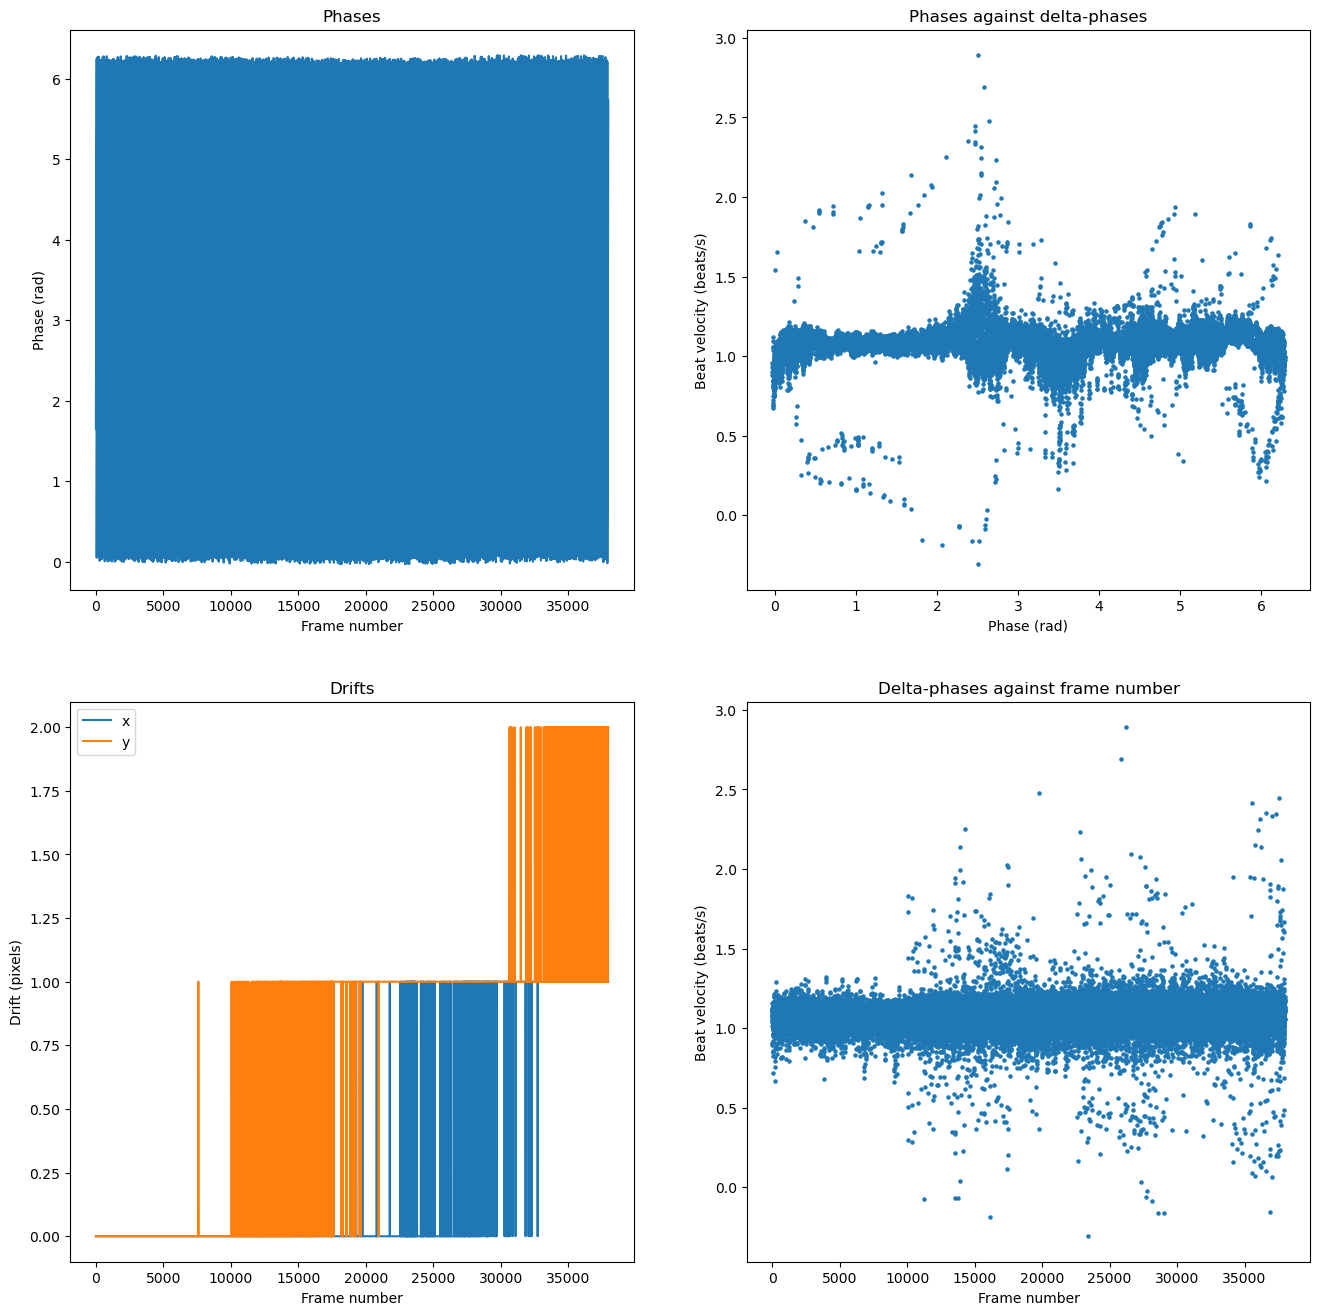

In [3]:
oog.plot_summary()

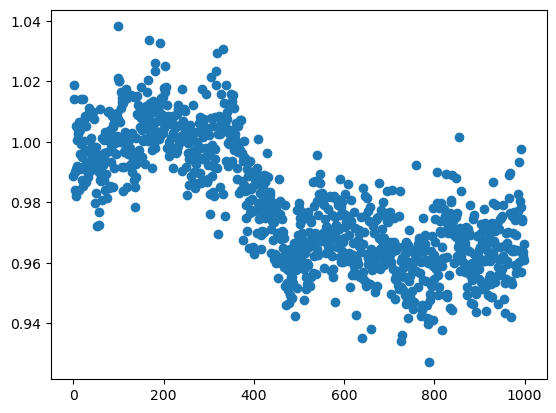

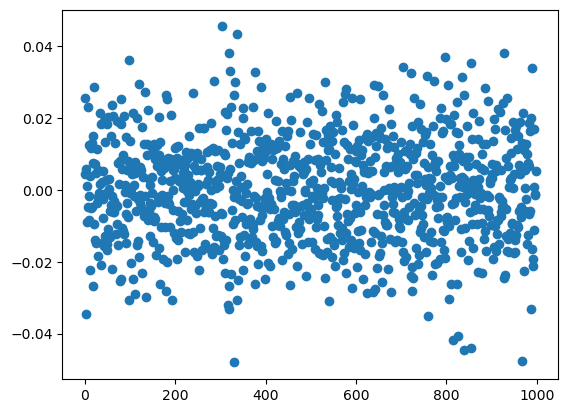

0.014124130354399238


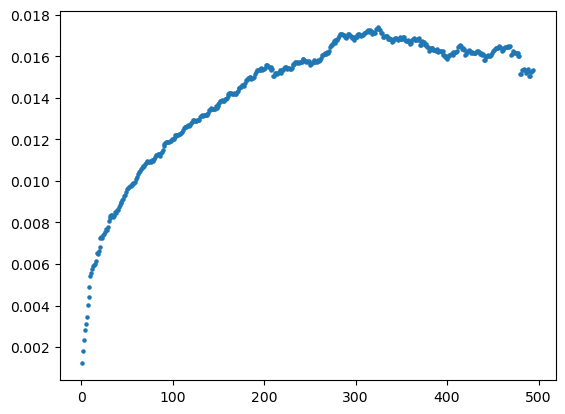

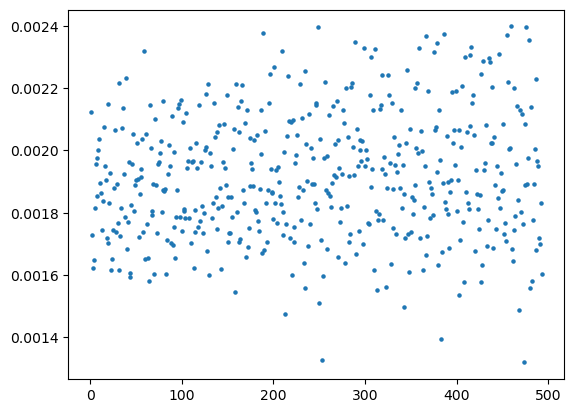

In [95]:
delta_phase = np.random.normal(1, 0.01, 1000) + np.cumsum(np.random.normal(0, 0.001, 1000))

plt.scatter(np.arange(1000), delta_phase)
plt.show()

plt.scatter(np.arange(999), np.diff(delta_phase))
plt.show()

print(np.std(np.diff(delta_phase)))

# Gets the noise spectrum by looking at the standard deviation of the change in delta phases over some time period.
def get_noise_spectrum(delta_phases, averaging_window):
    time_windows = range(1, (delta_phases.shape[0] - averaging_window) // 2)
    avg_delta_phases_std = []
    for time_window in time_windows:
        avg_delta_phases = []
        for i in np.arange(0, delta_phases.shape[0] - time_window - averaging_window, averaging_window):
            average_delta_phase_init = np.mean(delta_phases[i:i + averaging_window])
            average_delta_phase_final = np.mean(delta_phases[i + time_window:i + time_window + averaging_window])

            est_avg_delta_phases = average_delta_phase_init - average_delta_phase_final

            avg_delta_phases.append(est_avg_delta_phases)

        avg_delta_phases_std.append(np.std(avg_delta_phases))

    return time_windows, avg_delta_phases_std

time_windows, avg_delta_phases_std = get_noise_spectrum(delta_phase, 10)
plt.scatter(time_windows, avg_delta_phases_std, s = 5)
plt.show()

time_windows, avg_delta_phases_std = get_noise_spectrum(np.diff(delta_phase), 10)
plt.scatter(time_windows, avg_delta_phases_std, s = 5)
plt.show()

In [4]:
# Gets the noise spectrum by looking at the standard deviation of the change in delta phases over some time period.
def get_noise_spectrum(delta_phases, averaging_window):
    time_windows = range(1, (delta_phases.shape[0] - averaging_window) // 2)
    avg_delta_phases_std = []
    for time_window in time_windows:
        avg_delta_phases = []
        for i in np.arange(delta_phases.shape[0] - time_window - averaging_window):
            average_delta_phase_init = np.mean(delta_phases[i:i + averaging_window])
            average_delta_phase_final = np.mean(delta_phases[i + time_window:i + time_window + averaging_window])

            est_avg_delta_phases = average_delta_phase_init - average_delta_phase_final

            avg_delta_phases.append(est_avg_delta_phases)

        #plt.title(f"{time_window}")
        #plt.hist(avg_delta_phases, bins = 30)
        #plt.show()

        avg_delta_phases_std.append(np.std(avg_delta_phases))

    return time_windows, avg_delta_phases_std

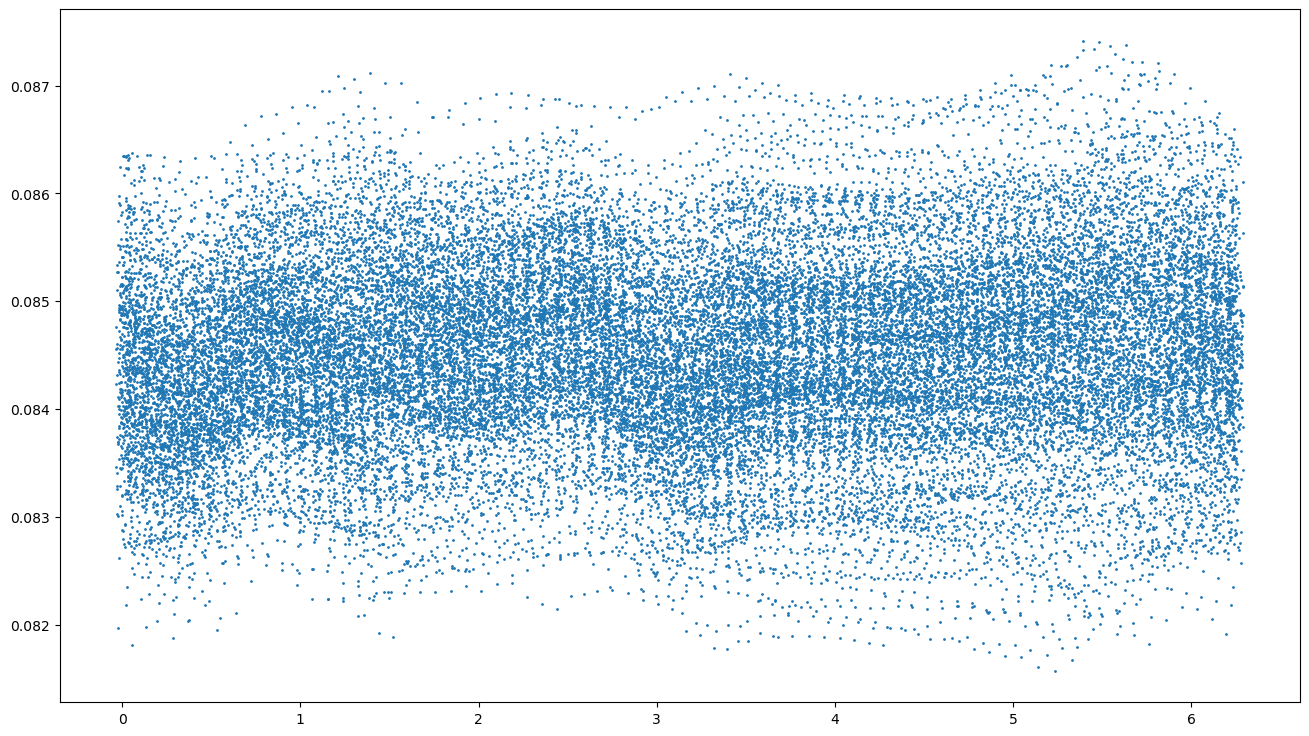

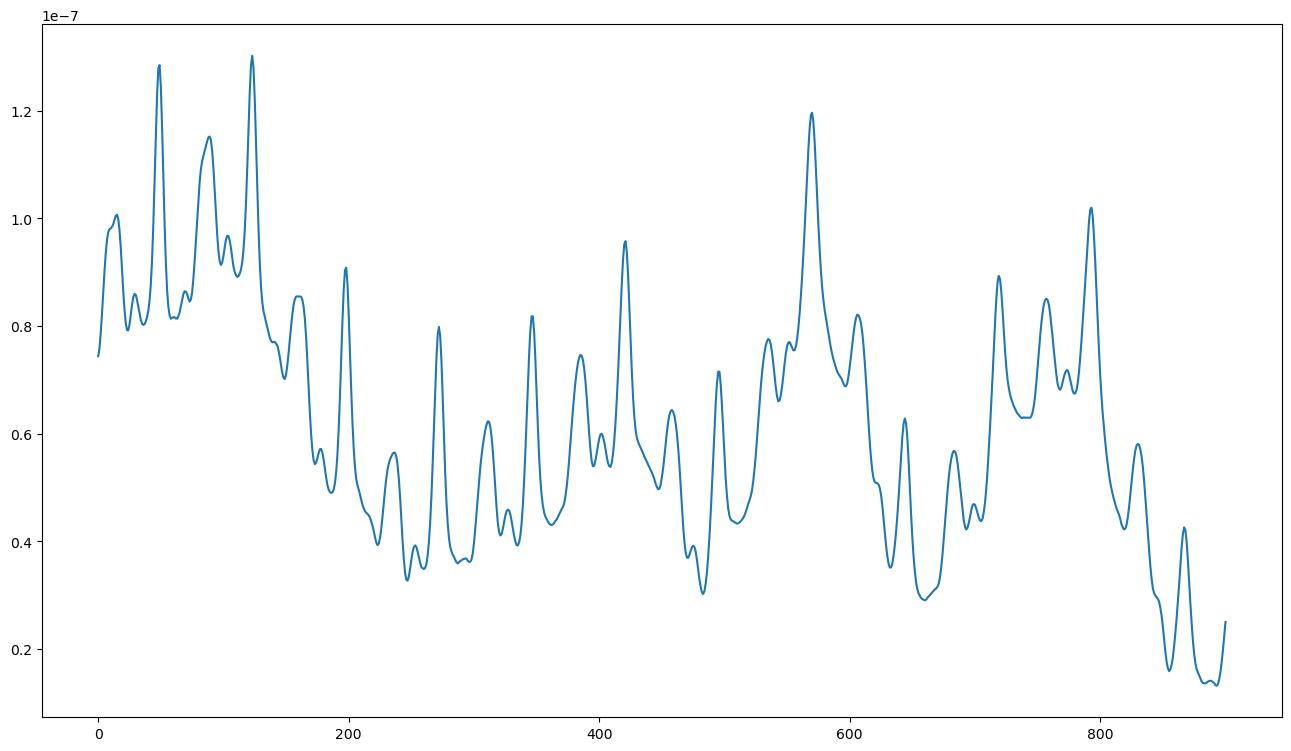

In [45]:
# Calculate autocovariance using numpy
def autocovariance(x, lags):
    n = len(x)
    x = x - np.mean(x)
    autocovs = np.correlate(x, x, mode='full') / n
    return autocovs[n - 1:n + lags]

# Get moving average of delta phases
delta_phases_ma = np.convolve(oog.delta_phases, np.ones(oog.sequence_manager.reference_sequence.shape[0]) / oog.sequence_manager.reference_sequence.shape[0], mode='valid')

plt.figure(figsize = (16,9))
plt.scatter(oog.phases[39:-39], delta_phases_ma, s = 1)
plt.show()

plt.figure(figsize = (16,9))
plt.plot(autocovariance(delta_phases_ma, 1000)[100::])
plt.show()

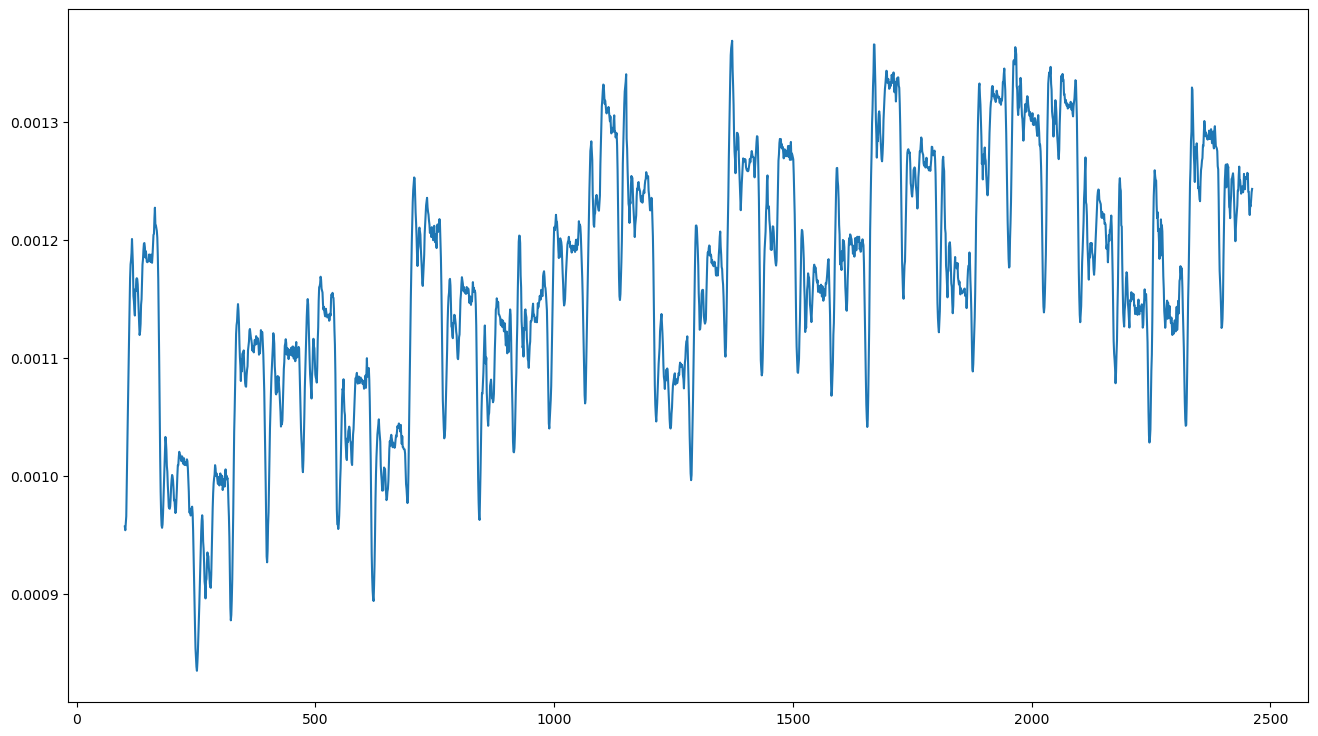

In [106]:
time_windows, avg_delta_phases_std = get_noise_spectrum(oog.delta_phases[0:5000], 74)
plt.figure(figsize = (16,9))
plt.plot(time_windows[100::], avg_delta_phases_std[100::])
plt.show()

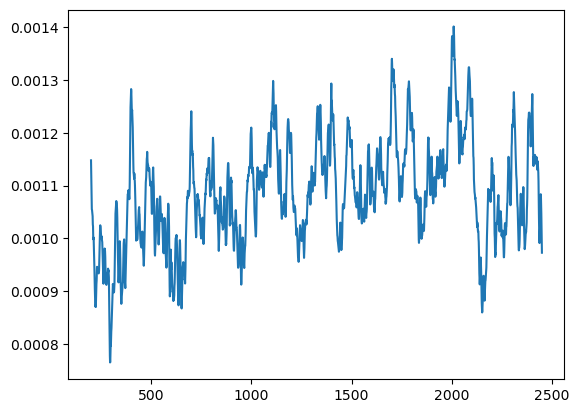